<a href="https://colab.research.google.com/github/okwasna/dane_wszystkie/blob/main/wersja_ostatnia_15_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:


file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')

print(f"Liczba genów przed filtrowaniem: {len(df)}")

mean_before_filtering = df['var'].mean()
variance_before_filtering = df['var'].var()

print(f"Średnia wariancji przed filtrowaniem: {mean_before_filtering}")
print(f"Wariancja przed filtrowaniem: {variance_before_filtering}")

variance_threshold = 10

df_filtered = df[df['var'] >= variance_threshold]

mean_after_filtering = df_filtered['var'].mean()
variance_after_filtering = df_filtered['var'].var()

print(f"Średnia wariancji po filtrowaniu: {mean_after_filtering}")
print(f"Wariancja po filtrowaniu: {variance_after_filtering}")

initial_counts = df['lncRNA'].value_counts()

filtered_counts = df_filtered['lncRNA'].value_counts()

removed_counts = initial_counts - filtered_counts

removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")

Liczba genów przed filtrowaniem: 28677
Średnia wariancji przed filtrowaniem: 83837021.10925484
Wariancja przed filtrowaniem: 1.4257388777828288e+20
Średnia wariancji po filtrowaniu: 108068243.92073244
Wariancja po filtrowaniu: 1.837809291273408e+20
Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [8]:
print(f"Liczba próbek (kolumn) branych pod uwagę do klastrowania: {df_filtered.shape[1]}")
print(f"Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: {df_filtered.shape[0]}")


Liczba próbek (kolumn) branych pod uwagę do klastrowania: 31
Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: 22247


In [12]:
from sklearn.preprocessing import StandardScaler
#k-means 40-60 co 5,
data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    print(f"\nKMeans dla {n_clusters} klastrów:")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)

    df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_

    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")

    silhouette_values = silhouette_samples(data_normalized, kmeans.labels_)

    df_filtered['Silhouette'] = silhouette_values

    cluster_silhouette_means = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean()

    print(f"Średni wskaźnik Silhouette dla każdego klastra:")
    print(cluster_silhouette_means)

    cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
    print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:")
    print(cluster_counts)

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")


KMeans dla 40 klastrów:


<ipython-input-12-d9e3fc3e9e32>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 40 klastrów: 0.6730


<ipython-input-12-d9e3fc3e9e32>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_40
0     0.836717
1     0.000000
2    -0.021573
3     0.000000
4     0.000000
5    -0.029876
6     0.000000
7     0.000000
8     0.155425
9     0.000000
10    0.147032
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.085226
17    0.197268
18    0.061358
19   -0.009449
20    0.190431
21    0.139933
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.258949
27    0.305512
28    0.000000
29    0.311178
30    0.291708
31    0.178459
32    0.000000
33    0.000000
34    0.073105
35    0.339696
36    0.000000
37   -0.003339
38    0.077619
39    0.119223
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
0     16200
30     3360
17     1514
39      593
10      245
38      123
31       67
19       34
21       31
5        15
8        12
27        7
16        6
37        4
29        3
20        3
35        3
2         2
34        2
18        2
26        

<ipython-input-12-d9e3fc3e9e32>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 45 klastrów: 0.6465


<ipython-input-12-d9e3fc3e9e32>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_45
0     0.840135
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5    -0.032983
6     0.000000
7     0.000000
8     0.167793
9     0.000000
10    0.134208
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.072719
17    0.167013
18    0.061358
19    0.015996
20    0.180613
21    0.055857
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.223181
27    0.219038
28    0.000000
29    0.293964
30    0.193759
31    0.145986
32    0.000000
33    0.000000
34    0.051474
35    0.279036
36    0.000000
37   -0.023788
38    0.029622
39   -0.013253
40    0.000000
41    0.000000
42    0.153095
43    0.127384
44    0.282563
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 45 klastrów:
Cluster_45
0     15303
44     3429
30     1718
17      813
10      344
43      179
39      148
38      103
31       57
19       44
42       21
21       17
8         9
5         8
27     

<ipython-input-12-d9e3fc3e9e32>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 50 klastrów: 0.6462


<ipython-input-12-d9e3fc3e9e32>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_50
0     0.840379
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.068933
6     0.000000
7     0.000000
8     0.098060
9     0.000000
10    0.131056
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.047084
17    0.164417
18    0.000000
19   -0.019429
20    0.140962
21    0.106701
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.223181
27    0.217219
28    0.000000
29    0.293964
30    0.195289
31    0.206853
32    0.000000
33    0.000000
34    0.051474
35    0.000000
36    0.000000
37   -0.051184
38    0.018872
39   -0.013563
40    0.000000
41    0.000000
42    0.134046
43    0.137557
44    0.281895
45    0.027041
46    0.000000
47    0.000000
48    0.005434
49    0.000000
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 50 klastrów:
Cluster_50
0     15289
44     3433
30     1719
17      820
10      341
43      181
39      147
38      101
31  

<ipython-input-12-d9e3fc3e9e32>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 55 klastrów: 0.6297


<ipython-input-12-d9e3fc3e9e32>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_55
0     0.841501
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.075836
6     0.000000
7     0.000000
8     0.174024
9     0.000000
10    0.130041
11    0.000000
12    0.112900
13    0.000000
14    0.000000
15    0.182797
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.011939
21   -0.007219
22    0.000000
23    0.000000
24    0.136943
25   -0.068926
26    0.154134
27    0.000000
28    0.126076
29    0.000000
30    0.000000
31    0.184669
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.172918
37    0.000000
38    0.000000
39   -0.040966
40    0.000000
41   -0.028551
42    0.000000
43    0.000000
44    0.110841
45    0.283018
46    0.000000
47    0.000000
48    0.261229
49    0.050796
50    0.000000
51    0.000000
52    0.000000
53    0.033930
54   -0.013896
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 55 klastrów:
Cluster_55
0     14768
45     3368
1

<ipython-input-12-d9e3fc3e9e32>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 60 klastrów: 0.6238
Średni wskaźnik Silhouette dla każdego klastra:
Cluster_60
0     0.840209
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.060182
6     0.000000
7     0.000000
8     0.174024
9     0.000000
10    0.088335
11    0.000000
12    0.148508
13    0.000000
14    0.000000
15    0.192352
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000828
21    0.068983
22    0.000000
23    0.000000
24    0.110622
25    0.026817
26    0.156141
27    0.000000
28    0.128711
29    0.000000
30    0.000000
31    0.158288
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.183905
37    0.000000
38    0.000000
39   -0.040431
40    0.000000
41   -0.034625
42    0.000000
43    0.000000
44    0.095103
45    0.277569
46    0.000000
47    0.000000
48    0.273157
49    0.077254
50    0.000000
51    0.000000
52    0.000000
53    0.104767
54   -0.018216
55    0.214300
56   -0.003418
57    0.000000
58    0.153946
59   

<ipython-input-12-d9e3fc3e9e32>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


In [7]:
import seaborn as sns
#klastrowanie n=40 i wygenerowanie map dla 40 powyzej 100 w klastrze

data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

n_clusters_40 = 40
kmeans_40 = KMeans(n_clusters=n_clusters_40, random_state=42)
kmeans_40.fit(data_normalized)

df_filtered[f'Cluster_{n_clusters_40}'] = kmeans_40.labels_
df_filtered['Silhouette_40'] = silhouette_samples(data_normalized, kmeans_40.labels_)

min_genes = 100
for cluster_id in range(n_clusters_40):
    cluster_genes = df_filtered[df_filtered[f'Cluster_{n_clusters_40}'] == cluster_id]

    if len(cluster_genes) > min_genes:
        heatmap_data = cluster_genes.loc[:, 'SRR7451446':]
        cluster_silhouette_mean = cluster_genes['Silhouette_40'].mean()

        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, cmap="viridis", cbar=True, yticklabels=False)

        plt.title(f"Heatmap for Cluster {cluster_id} (n = {len(cluster_genes)}, Silhouette = {cluster_silhouette_mean:.4f})")
        plt.xlabel("Samples")
        plt.ylabel("Genes")
        plt.tight_layout()
        plt.show()


NameError: name 'StandardScaler' is not defined

In [9]:
print(df_filtered.head())


  Unnamed: 0  lncRNA        mean            var  coeff of var  SRR7451446  \
0        7SK       0    3.762019      21.888072      1.243606    1.357138   
3        A2M       0   20.267104    1297.462576      1.777279   26.464191   
4    A2M-AS1       1    5.144518      30.254474      1.069178    0.000000   
5      A2ML1       0    9.435519     229.189277      1.604469   17.642794   
7     A4GALT       0  708.942320  269934.529600      0.732855  220.534924   

   SRR7451447  SRR7451449  SRR7451450  SRR7451451  ...   SRR7451470  \
0    1.675025    2.385340    1.672319    3.724756  ...     1.380182   
3  179.227647    7.156021    5.853117    9.311891  ...     5.520728   
4    2.512537    7.156021    3.344638    4.655945  ...     6.900910   
5    0.837512    1.590227    5.016957   17.692592  ...     1.380182   
7  253.766248  464.346272  445.673028  101.499607  ...  1556.845357   

    SRR7451471   SRR7451472  Cluster_40  Silhouette  Cluster_45  Cluster_50  \
0     0.000000     0.000000    

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering_50 = AgglomerativeClustering(n_clusters=50)
agg_labels_50 = agg_clustering_50.fit_predict(data_normalized)

df_filtered.loc[:, 'Agg_Cluster_50'] = agg_labels_50

agg_silhouette_avg_50 = silhouette_score(data_normalized, agg_labels_50)
print(f"Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): {agg_silhouette_avg_50:.4f}")

agg_cluster_counts_50 = pd.Series(agg_labels_50).value_counts()
print(f"Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):")
print(agg_cluster_counts_50)


agg_silhouette_values_50 = silhouette_samples(data_normalized, agg_labels_50)
agg_cluster_silhouettes_50 = pd.DataFrame({
    'Cluster': agg_labels_50,
    'Silhouette': agg_silhouette_values_50
}).groupby('Cluster')['Silhouette'].mean()

print("Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):")
print(agg_cluster_silhouettes_50)

<ipython-input-10-baf6710b0c82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Agg_Cluster_50'] = agg_labels_50


Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): 0.7301
Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):
40    10147
20     1371
18     1095
13      871
24      700
22      697
48      662
17      639
7       583
14      558
12      543
39      521
6       433
21      425
16      332
26      313
37      303
15      271
2       243
0       226
38      226
30      219
43      195
49      157
8       148
5       105
29       95
23       62
4        47
1        14
10        8
19        7
11        6
9         5
3         4
25        2
45        1
27        1
28        1
34        1
41        1
47        1
44        1
36        1
32        1
31        1
35        1
42        1
33        1
46        1
Name: count, dtype: int64
Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):
Cluster
0     0.060255
1     0.105197
2     0.247630
3     0.221941
4     0.053888
5     0.118656
6     0.196495
7     0.653995
8    

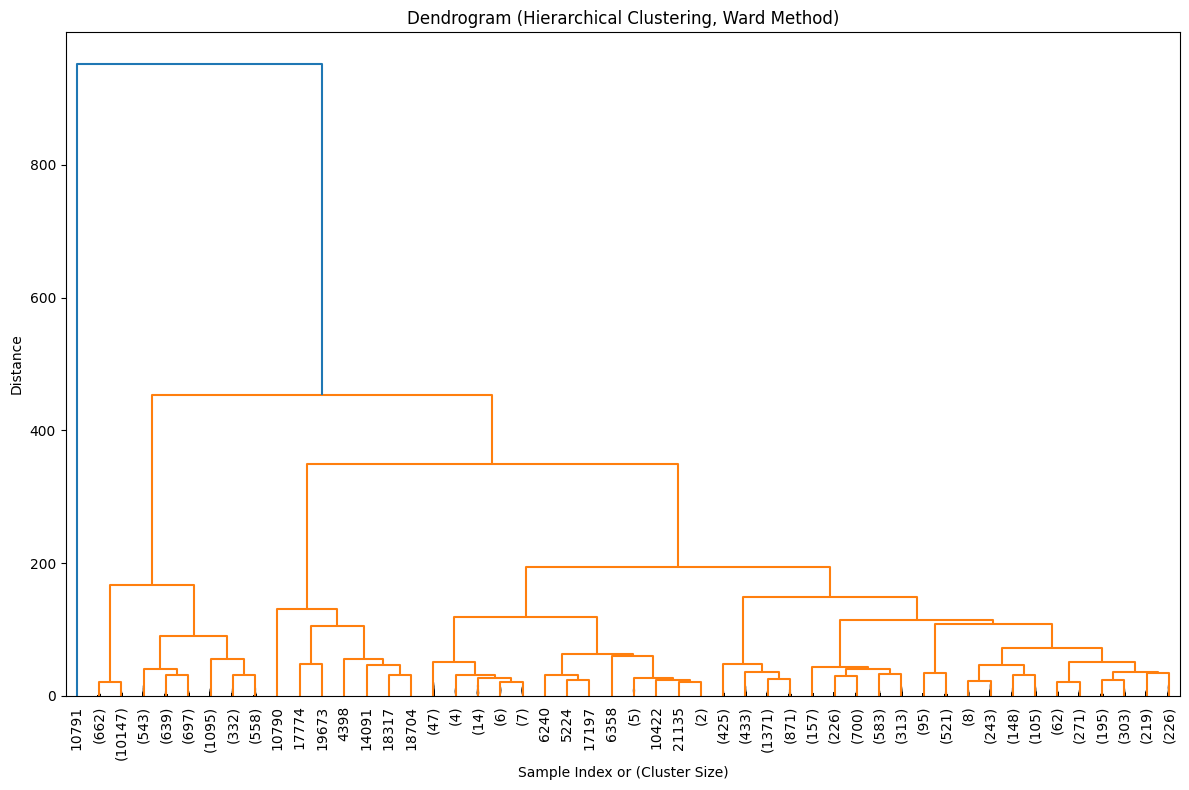

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data_normalized, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram (Hierarchical Clustering, Ward Method)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels

dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla DBSCAN:")
print(dbscan_cluster_counts)

if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette_avg = silhouette_score(data_normalized, dbscan_labels)
    print(f"Średni wskaźnik Silhouette dla DBSCAN: {dbscan_silhouette_avg:.4f}")
else:
    print("Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).")


Ilość genów w każdym klastrze dla DBSCAN:
 0     11514
 2      1765
 3      1279
 8       988
 10      893
 7       891
-1       772
 4       734
 13      582
 9       521
 11      417
 5       275
 14      253
 18      225
 6       209
 17      180
 1       155
 16      141
 12       95
 26       55
 23       40
 20       38
 15       36
 21       34
 19       26
 25       25
 28       23
 22       15
 27       14
 29       12
 32       10
 24       10
 30       10
 31       10
Name: count, dtype: int64
Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).


<ipython-input-12-bbbb4f961d23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels


<ipython-input-13-33e5476e70ae>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PCA1'] = pca_result[:, 0]
<ipython-input-13-33e5476e70ae>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PCA2'] = pca_result[:, 1]


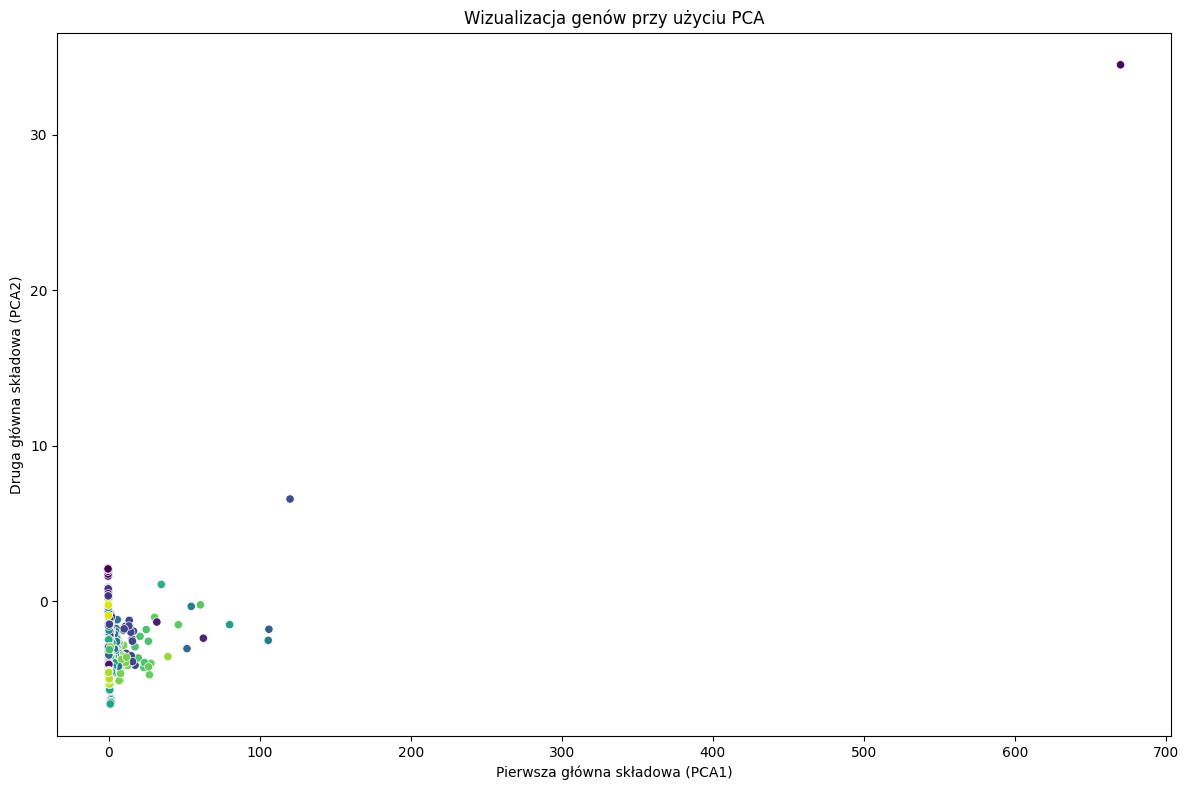

Wyjaśniona wariancja przez PCA1: 68.51%
Wyjaśniona wariancja przez PCA2: 16.54%


In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Wyodrębnienie danych ekspresji genów
data_values = df_filtered.loc[:, 'SRR7451446':]

# Normalizacja danych (jeśli jeszcze nie znormalizowana)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

# PCA z dwoma wymiarami
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Przypisanie wyników do DataFrame
df_filtered['PCA1'] = pca_result[:, 0]
df_filtered['PCA2'] = pca_result[:, 1]

# Wizualizacja PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', data=df_filtered,
    hue=f'Cluster_{n_clusters_40}', palette='viridis', legend=None
)
plt.title("Wizualizacja genów przy użyciu PCA")
plt.xlabel("Pierwsza główna składowa (PCA1)")
plt.ylabel("Druga główna składowa (PCA2)")
plt.tight_layout()
plt.show()

# Wyjaśniona wariancja
print(f"Wyjaśniona wariancja przez PCA1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Wyjaśniona wariancja przez PCA2: {pca.explained_variance_ratio_[1]:.2%}")


In [13]:
import pandas as pd

# Zakładamy, że `df_filtered` zawiera wyniki klastrowania K-Means
# Klaster przypisany do każdego genu jest w kolumnie, np. 'Cluster_40'

n_clusters = 40  # Liczba klastrów z klastrowania K-Means
cluster_column = f'Cluster_{n_clusters}'  # Nazwa kolumny z klastrami

# Grupa według klastra
for cluster_id in range(n_clusters):
    cluster_data = df_filtered[df_filtered[cluster_column] == cluster_id]

    print(f"\nStatystyki opisowe dla klastra {cluster_id} (liczba genów: {len(cluster_data)}):")

    # Statystyki opisowe dla kolumn z ekspresją
    print(cluster_data.loc[:, 'SRR7451446':].describe())

    # Wyświetlenie listy genów w klastrze
    gene_list = cluster_data['Unnamed: 0'].tolist()  # Zakładamy, że geny są w kolumnie 'Unnamed: 0'
    print(f"Geny w klastrze {cluster_id}:")
    print(gene_list[:10])  # Wyświetlenie maksymalnie 10 genów
    print(f"... (+ {len(gene_list) - 10} więcej)" if len(gene_list) > 10 else "")



Statystyki opisowe dla klastra 0 (liczba genów: 16200):
         SRR7451446    SRR7451447    SRR7451449    SRR7451450    SRR7451451  \
count  16200.000000  16200.000000  16200.000000  16200.000000  16200.000000   
mean      90.857038     87.515907     83.826802     78.775312     89.513997   
std      167.028011    165.048848    150.176940    144.824800    186.118200   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.107121      1.675025      2.385340      2.508479      6.518323   
50%       20.357070      9.212636     11.926702     10.033914     18.623781   
75%       99.071073     92.963873     90.642937     81.107474     97.774851   
max     3063.739014   2390.260301   1924.969734   1896.409807   9706.714723   

         SRR7451452    SRR7451453    SRR7451454    SRR7451455    SRR7451456  \
count  16200.000000  16200.000000  16200.000000  16200.000000  16200.000000   
mean      93.519993     92.913416     76.558478     86.752738     87.1999

In [16]:
# Zakładamy, że kolumna z numerami klastrów to 'Cluster_40'
cluster_column = 'Cluster_40'

# Znajdź wszystkie unikalne klastery
unique_clusters = df_filtered[cluster_column].unique()

# Iteracja po każdym klastrze
for cluster_id in unique_clusters:
    # Geny w aktualnym klastrze
    gene_list = df_filtered[df_filtered[cluster_column] == cluster_id]['Unnamed: 0'].tolist()
    print(f"\nGeny w klastrze {cluster_id} ({len(gene_list)} genów):")
    print(gene_list)



Geny w klastrze 0 (16200 genów):
['7SK', 'A2M', 'A2M-AS1', 'A2ML1', 'AACS', 'AADAC', 'AADACL2', 'AADACL2-AS1', 'AADACL3', 'AADACP1', 'AAMDC', 'AANAT', 'AARSD1', 'AARSD1P1', 'AASDH', 'AATBC', 'AATK', 'AB015752.3', 'AB019441.29', 'ABALON', 'ABAT', 'ABC10-44372100G24.1', 'ABC12-46663800M24.2', 'ABC7-42404400C24.1', 'ABCA10', 'ABCA11P', 'ABCA12', 'ABCA13', 'ABCA17P', 'ABCA2', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCA9', 'ABCB1', 'ABCB10', 'ABCB11', 'ABCB4', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC10', 'ABCC11', 'ABCC12', 'ABCC2', 'ABCC3', 'ABCC5', 'ABCC6', 'ABCC8', 'ABCC9', 'ABCD1', 'ABCG2', 'ABCG4', 'ABCG5', 'ABCG8', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD11-AS1', 'ABHD12', 'ABHD12B', 'ABHD14A', 'ABHD14B', 'ABHD15', 'ABHD16A', 'ABHD17A', 'ABHD17B', 'ABHD17C', 'ABHD18', 'ABHD3', 'ABHD6', 'ABHD8', 'ABI3', 'ABITRAM', 'ABLIM2', 'ABRACL', 'ABRAXAS1', 'ABTB1', 'ABTB2', 'AC000050.1', 'AC000068.10', 'AC000068.5', 'AC000078.5', 'AC000120.7', 'AC000123.2', 'AC000123.3', 'AC000123.4', 'AC00040

In [5]:
print(df_filtered.columns)


Index(['Unnamed: 0', 'lncRNA', 'mean', 'var', 'coeff of var', 'SRR7451446',
       'SRR7451447', 'SRR7451449', 'SRR7451450', 'SRR7451451', 'SRR7451452',
       'SRR7451453', 'SRR7451454', 'SRR7451455', 'SRR7451456', 'SRR7451457',
       'SRR7451458', 'SRR7451459', 'SRR7451460', 'SRR7451461', 'SRR7451462',
       'SRR7451463', 'SRR7451464', 'SRR7451465', 'SRR7451466', 'SRR7451467',
       'SRR7451468', 'SRR7451469', 'SRR7451470', 'SRR7451471', 'SRR7451472'],
      dtype='object')
